### 树模型的可视化展示

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:, 2:]
y=iris.target

dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

然后，你可以使用graphviz包中的dot命令行工具将此**.dot**文件转换为各种格式，如PDF或PNG。下面这条命令行将.dot文件转换为.png图像文件：

$ dot -Tpng iris_tree.dot -o iris_tree.png

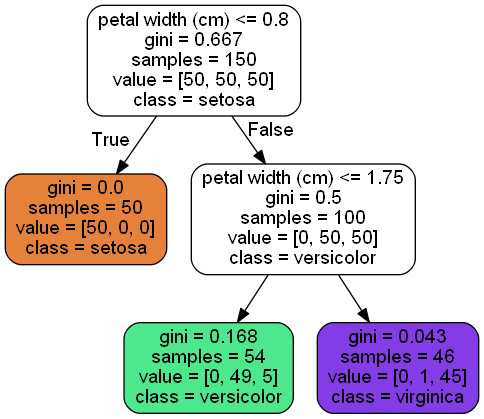

In [6]:
from IPython.display import Image
Image(filename='iris_tree.png', width=400, height=600)

### 决策边界展示

Text(0.5, 1.0, 'Decision Tree decision boundaries')

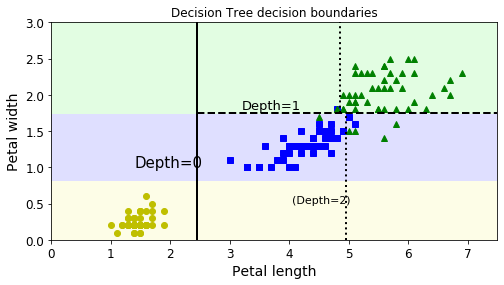

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(dtc, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.title('Decision Tree decision boundaries')

### 概率估计

**估计类概率**
输入数据为：花瓣长5厘米，宽1.5厘米的花。 相应的叶节点是深度为2的左节点，因此决策树应输出以下概率：

* Iris-Setosa 为 0％（0/54），
* Iris-Versicolor 为 90.7％（49/54），
* Iris-Virginica 为 9.3％（5/54）。

In [8]:
dtc.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
dtc.predict([[5, 1.5]])

array([1])

In [10]:
dtc.predict_proba([[6, 1.8]])

array([[0.        , 0.02173913, 0.97826087]])

In [11]:
dtc.predict([[6, 1.8]])

array([2])

### 决策树中的正则化

**DecisionTreeClassifier类**还有一些其他参数类似地限制了决策树的形状：

* min_samples_split（节点在分割之前必须具有的最小样本数），

* min_samples_leaf（叶子节点必须具有的最小样本数），

* max_leaf_nodes（叶子节点的最大数量），

* max_features（在每个节点处评估用于拆分的最大特征数）。

* max_depth(树最大的深度)

In [12]:
from sklearn.datasets import make_moons
X, y=make_moons(n_samples=100, noise=0.25, random_state=12)
dtc1=DecisionTreeClassifier(random_state=13)
dtc2=DecisionTreeClassifier(min_samples_leaf=4, random_state=13)
dtc1.fit(X, y)
dtc2.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

Text(0.5, 1.0, 'min_samples_leaf=4')

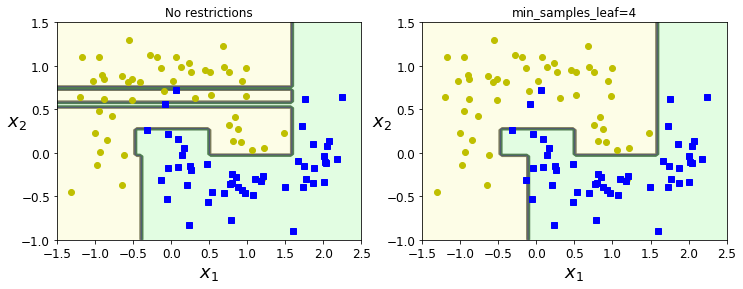

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_decision_boundary(dtc1, X, y, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('No restrictions')

plt.subplot(122)
plot_decision_boundary(dtc2, X, y, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('min_samples_leaf=4')

### 对数据的敏感

In [16]:
np.random.seed(6)
Xs=np.random.rand(100, 2) -0.5
ys=(Xs[:, 0]>0).astype(np.float32)*2

angle=np.pi/4
rotaion_matrix=np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr=Xs.dot(rotaion_matrix)

Text(0.5, 1.0, 'Sensitivity to training set rotation')

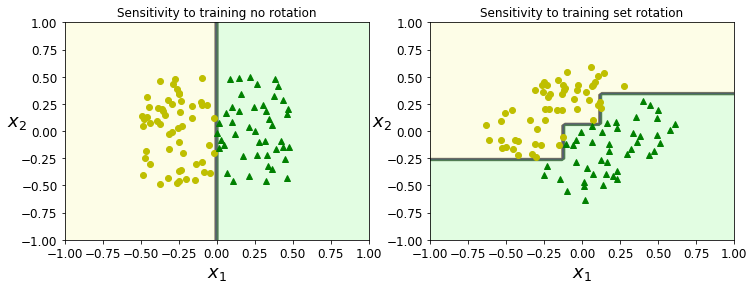

In [18]:
dtc3=DecisionTreeClassifier(random_state=12)
dtc3.fit(Xs, ys)
dtc4=DecisionTreeClassifier(random_state=12)
dtc4.fit(Xsr, ys)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_decision_boundary(dtc3, Xs, ys, axes=[-1, 1, -1, 1], iris=False)
plt.title('Sensitivity to training no rotation')

plt.subplot(122)
plot_decision_boundary(dtc4, Xsr, ys, axes=[-1, 1, -1, 1], iris=False)
plt.title('Sensitivity to training set rotation')

### 回归任务

In [19]:
np.random.seed(12)
m=200
X=np.random.rand(m, 1)
y = 4*(X-0.5)**2
y=y+np.random.randn(m, 1)/10

In [20]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(max_depth=2)
dtr.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
export_graphviz(
    dtr,
    out_file=('regression_tree.dot'),
    feature_names=['x1'],
    rounded=True,
    filled=True
)

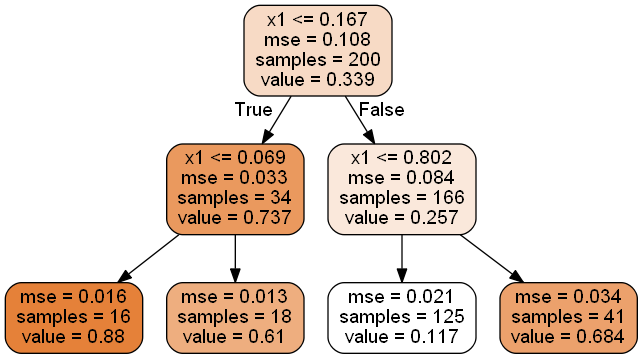

In [23]:
# 你的第二个决策树长这样
from IPython.display import Image
Image(filename='regression_tree.png', width=500, height=500)

对比树的深度对结果的影响

In [24]:
dtr1=DecisionTreeRegressor(random_state=12, max_depth=2)
dtr2=DecisionTreeRegressor(random_state=12, max_depth=3)
dtr1.fit(X, y)
dtr2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12, splitter='best')

In [25]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

Text(0.5, 1.0, 'max_depth=3')

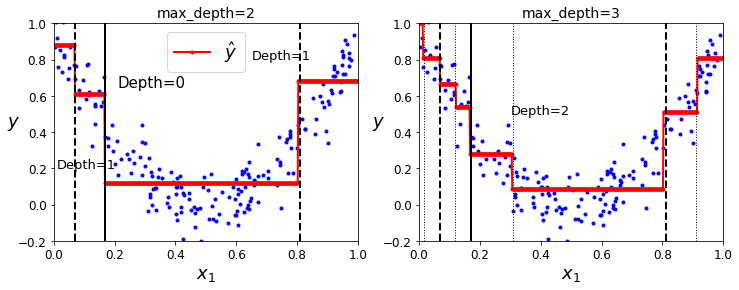

In [46]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_regression_predictions(dtr1, X, y)
for split, style in ((0.17, 'k-'), (0.07, 'k--'), (0.81, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(dtr2, X, y)
for split, style in ((0.17, 'k-'), (0.07, 'k--'), (0.81, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.015, 0.12, 0.31, 0.91):
    plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)

plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

In [49]:
dtr3=DecisionTreeRegressor(random_state=12)
dtr4=DecisionTreeRegressor(random_state=12, min_samples_leaf=10)
dtr3.fit(X, y)
dtr4.fit(X, y)

x1=np.linspace(0, 1, 200).reshape(-1, 1)
y_pred3=dtr3.predict(x1)
y_pred4=dtr4.predict(x1)

Text(0.5, 1.0, 'min_samples_leaf=10')

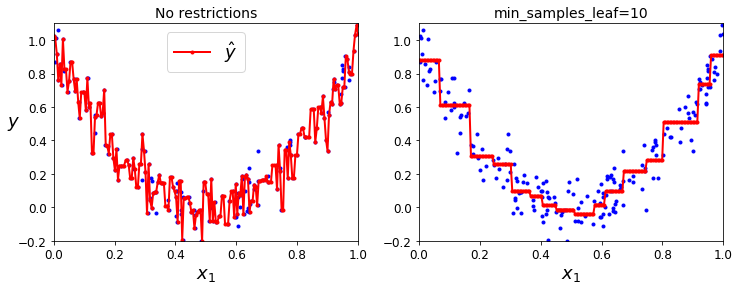

In [57]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred3, 'r.-', linewidth=2, label=r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.legend(loc='upper center', fontsize=18)
plt.title('No restrictions', fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred4, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(dtr4.min_samples_leaf), fontsize=14)